<a href="https://colab.research.google.com/github/PranavShekhar30/GRIP-Feb-2021/blob/main/task1_grip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - THE SPARKS FOUNDATION** 

**Data Science & Business Analytics Internship**

**Task-1 : Prediction using Supervised ML**

Predict the percentage of a student based on the number of study hours. This is a simple linear regression task as it involves just 2 variables.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn import metrics  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Loading dataset**

In [2]:
url = "https://raw.githubusercontent.com/PranavShekhar30/GRIP-Feb-2021/main/student_scores%20-%20student_scores.csv.txt"
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## **Data Visualization**

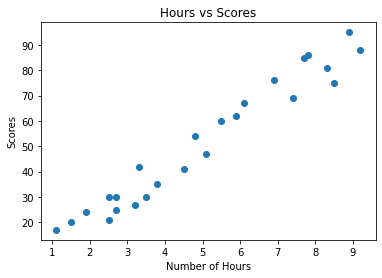

In [5]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

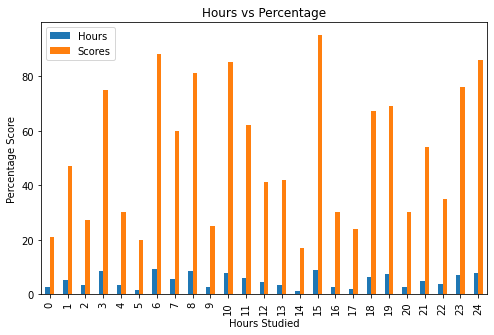

In [6]:
data.plot(kind='bar',figsize=(8,5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# **Data Preprocessing**

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [8]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [9]:
# Training the algorithm
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Training complete.')

Training complete.


In [10]:
print("The coefficient is:")
lr.coef_

The coefficient is:


array([9.94167834])

In [11]:
# Getting the best fitted line 
line = lr.intercept_+lr.coef_*X

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


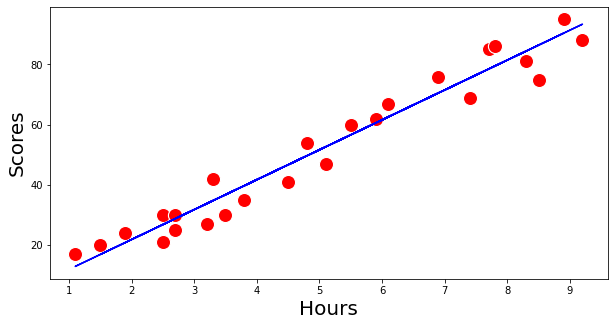

In [12]:
# Plotting the best fitted line on the graph 
plt.figure(figsize=(10,5))
sns.scatterplot(data['Hours'],data['Scores'],s=200,color='r')
plt.plot(data['Hours'],line,'b')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()

In [13]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [14]:
# Comparing Actual vs Predicted values
datafr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
datafr

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [15]:
#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805
R-2: 0.9367661043365056


***R-2 gives the score of model fit and in this case we have R-2 = 0.9367661043365055 which is great score for this model.***

In [16]:
# Testting the model to redict the percentage of student if he studies for 9.25 hours as given
hours = 9.25
pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


# **Conclusion:**
We can see the value of the root mean squared error is 4.509 and root mean squared error is less than 10% of the mean value of the percenttages of all the student scores. Also, the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.

Thank you!